# Week 01. Introduction to Text Data

Sequencing Legal DNA: NLP for Law and Political Economy
<br>Elliott Ash, ETH Zurich

In [51]:
# set random seed
import numpy as np
np.random.seed(4)

# Loading and Inspecting Data with Pandas

In [52]:
#import warnings; warnings.simplefilter('ignore')
# !pip install pandas
import pandas as pd
df = pd.read_csv('sc_cases.zip',compression='gzip')

In [53]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
case_name         786 non-null object
opinion_type      820 non-null object
date_standard     820 non-null object
authorship        820 non-null object
x_republican      803 non-null float64
maj_judges        786 non-null object
dissent_judges    786 non-null object
topic_id          786 non-null float64
cite_count        812 non-null float64
opinion_text      820 non-null object
dtypes: float64(3), object(7)
memory usage: 64.2+ KB


In [54]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
3,NaN,majority,2005-04-15,KENNEDY,1.0,NaN,NaN,NaN,6.0,"Justice Kennedy, Circuit Justice. \n\n This is..."
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...


In [55]:
# drop missing
df = df.dropna()
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...
5,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...


In [56]:
# Number of label categories (e.g. judges)
df['authorship'].describe()

count        781
unique        27
top       SCALIA
freq          86
Name: authorship, dtype: object

In [57]:
# tabulations of label categories 
df['authorship'].value_counts()

SCALIA                                           86
GINSBURG                                         81
KENNEDY                                          79
THOMAS                                           79
BREYER                                           73
STEVENS                                          72
SOUTER                                           72
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          28
ALITO                                            23
Breyer                                           12
Roberts                                          10
Alito                                             9
Scalia                                            8
Thomas                                            8
Ginsburg                                          8
Stevens                                           7
Kennedy                                           7
SOTOMAYOR   

In [58]:
df['authorship'] = df['authorship'].str.upper()

In [59]:
df['authorship'].value_counts()

SCALIA                                           94
GINSBURG                                         89
THOMAS                                           87
KENNEDY                                          86
BREYER                                           85
STEVENS                                          79
SOUTER                                           77
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          38
ALITO                                            32
SOTOMAYOR                                         7
STEVENS  AND  O'CONNOR ;  REHNQUIST ;  BREYER     2
ROBERTS ,  SCALIA ,  THOMAS ,  ALITO              1
BREYER ;                                          1
STEVENS  (IN PART),  BREYER  (IN PART)            1
JUSTICE  ALITO                                    1
Name: authorship, dtype: int64

In [60]:
# keep all judges through ALITO
keep_judges = list(df['authorship'].value_counts().index)[:11]
print(keep_judges)

['SCALIA', 'GINSBURG', 'THOMAS', 'KENNEDY', 'BREYER', 'STEVENS', 'SOUTER', "O'CONNOR", 'REHNQUIST', 'ROBERTS', 'ALITO']


In [61]:
df = df[df['authorship'].isin(keep_judges)]
df['authorship'].value_counts()

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

In [62]:
df.date_standard

0      2003-03-04
1      2003-06-09
2      2005-03-30
4      2005-06-06
5      2005-06-13
          ...    
815    2001-04-18
816    2001-04-24
817    2001-04-24
818    2001-05-14
819    2001-05-14
Name: date_standard, Length: 768, dtype: object

In [63]:
df['date_standard'] = pd.to_datetime(df['date_standard'])
df['date_standard']

0     2003-03-04
1     2003-06-09
2     2005-03-30
4     2005-06-06
5     2005-06-13
         ...    
815   2001-04-18
816   2001-04-24
817   2001-04-24
818   2001-05-14
819   2001-05-14
Name: date_standard, Length: 768, dtype: datetime64[ns]

In [64]:
df['year'] = df['date_standard'].dt.year
df['year'].value_counts()

2001    77
2000    76
2009    74
2002    74
2004    73
2005    70
2003    70
2007    65
2010    64
2006    63
2008    62
Name: year, dtype: int64

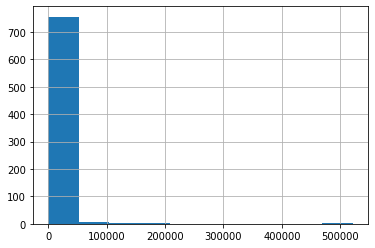

In [65]:
df['cite_count'].hist()

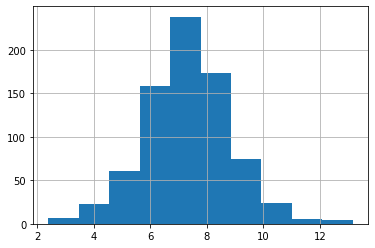

In [66]:
import numpy as np
df['log_cite_count'] = np.log(df['cite_count'])
df['log_cite_count'].hist()

Save what we have done so far.

In [67]:
df.to_pickle('sc_cases_cleaned.pkl',compression='gzip')

## Iterating over documents in a dataframe

In [68]:
import nltk

# run these if you have not yet:
#nltk.download('stopwords') 
#nltk.download('punkt') 

In [69]:
from gensim.utils import simple_preprocess

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = simple_preprocess(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    
    if i > 100:
        break

In [70]:
# first and second opinions
processed[0][:10], processed[1][:10]

(['justice',
  'ginsburg',
  'delivered',
  'the',
  'opinion',
  'of',
  'the',
  'court',
  'motion',
  'by'],
 ['justice',
  'stevens',
  'delivered',
  'the',
  'opinion',
  'of',
  'the',
  'court',
  'in',
  'most'])

## Saving data

In [71]:
# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')
# delete it
import os 
os.remove('processed_corpus.pkl')

In [72]:
# Merging Data-frames Example
# Perform a left join:
# df_merged = pd.merge(df1,df2,on='id', how='left', validation='m:1')

# Web Scraping

## Downloading URL's

In [73]:
import urllib # Python's module for accessing web pages
url = 'https://goo.gl/VRF8Xs' # shortened URL for court case
page = urllib.request.urlopen(url) # open the web page

html = page.read() # read web page contents as a string
print(html[:400])  # print first 400 characters
print()
print(html[-400:]) # print last 400 characters
print()
print(len(html),'characters in string.')   # print length of string

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta charset="utf-8"/>\n  <meta http-equiv="Content-Language" content="en"/>\n  <meta name="language" content="en_us"/>\n  <meta name="viewport" content="width=device-width,initial-scale=1"/>\n\n  \n  <meta name="description" content="Opinion for People v. Germany, 674 P.2d 345 \xe2\x80\x94 Brought to you by Free Law Project, a non-profit dedicated to creating high qual'

b'     s = d.getElementsByTagName(\'script\')[0];\n      g.type = \'text/javascript\';\n      g.async = true;\n      g.defer = true;\n      g.src = u + \'matomo.js\';\n      s.parentNode.insertBefore(g, s);\n    })();\n  </script>\n  <noscript><p><img src="//matomo.courtlistener.com/piwik.php?idsite=1&rec=1"\n                    style="border:0;" alt=""/></p></noscript>\n  <!-- End Matomo Code -->\n\n</body>\n</html>\n'

77373 characters in string.


## Parsing HTML

In [74]:
# Parse raw HTML
# !pip install beautifulsoup4
from bs4 import BeautifulSoup # package for parsing HTML
soup = BeautifulSoup(html, 'lxml') # parse html of web page
print(soup.title) # example usage: print title item

<title>People v. Germany, 674 P.2d 345 – CourtListener.com</title>


In [75]:
# extract text
text = soup.get_text() # get text (remove HTML markup)
lines = text.splitlines() # split string into separate lines
print(len(lines)) # print number of lines

534


In [76]:
lines = [line for line in lines if line != ''] # drop empty lines
print(len(lines)) # print number of lines

199


In [77]:
print(lines[:20]) # print first 20 lines

['People v. Germany, 674 P.2d 345 – CourtListener.com', 'Toggle navigation', 'About', 'FAQ', 'Donate', 'Sign in / Register', 'From Free Law Project, a 501(c)(3) non-profit.', 'Opinions\xa0', 'Advanced Search', 'Citation Look Up', 'RECAP Archive', 'Oral Arguments', 'Judges', 'Visualizations\xa0', 'Gallery', 'SCOTUS Networks', 'New Network', '\xa0Donate', 'Your Notes', '                    (edit)']


## Removing unicode characters

In [78]:
# !pip install unidecode
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


## Translation

In [79]:
# !pip install googletrans
from googletrans import Translator
translator = Translator()
lang = translator.detect('이 문장은 한글로 쓰여졌습니다.').lang
lang

'ko'

In [80]:
eng = translator.translate('이 문장은 한글로 쓰여졌습니다.',
                           src=lang,
                           dest='en')
eng.text

'This sentence is written in Hangul.'

# Quantity of Text

Count words per document.

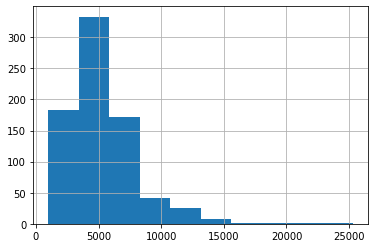

In [81]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our dataframe
df['num_words'] = df['opinion_text'].apply(get_words_per_doc)
df['num_words'].hist()

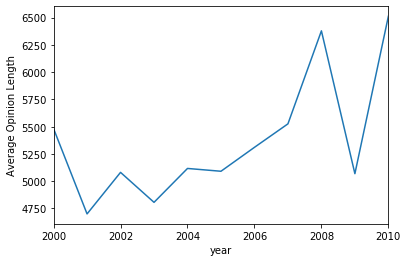

In [82]:
# plot length by year
ax = df.groupby('year')['num_words'].mean().plot()
ax.set_ylabel('Average Opinion Length')
import matplotlib.pyplot as plt
plt.show()

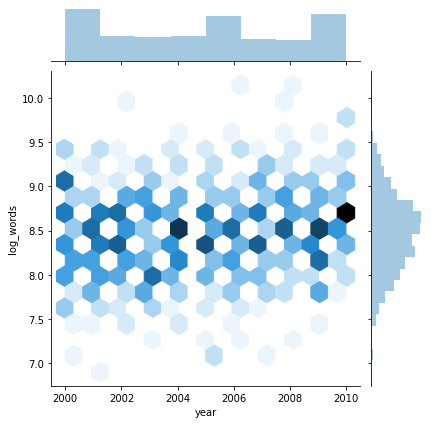

In [206]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='year', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [83]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['opinion_text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 31600),
 ('of', 15978),
 ('to', 12330),
 ('a', 8954),
 ('that', 8521),
 ('in', 8324),
 ('and', 7619),
 ('at', 5044),
 ('for', 4496),
 ('is', 4032),
 ('not', 3577),
 ('l.', 3216),
 ('ed.', 3190),
 ('as', 3048),
 ('or', 2904),
 ('s.', 2828),
 ('§', 2738),
 ('ct.', 2735),
 ('court', 2615),
 ('on', 2587)]

Compute (Number of documents) / (number of words per document). The google text classification guide recommends using N-Grams if this number is below 1500, or embedded sequences if this number is above 1500:

In [84]:
print(df.shape[0] / df['num_words'].mean())

0.14378176483594116


# Dictionary / Matching Methods

## Sentiment Analysis

In [85]:
# Dictionary-Based Sentiment Analysis
# nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity = sid.polarity_scores(text)
print(polarity)

{'neg': 0.134, 'neu': 0.785, 'pos': 0.081, 'compound': -0.9999}


In [86]:
# sample 20% of the dataset
dfs = df.sample(frac=.2) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['opinion_text'].apply(get_sentiment)

In [87]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

['he Court.\n\nPetitioners are the Boy Scouts of America and the Monmouth Council, a division of the Boy',
 't.\n\nIn the latest chapter of this long-litigated original-jurisdiction case, the Quechan Tribe (Trib',
 '\nWe granted certiorari in this case to decide whether imposing class arbitration on parties whose ar',
 't. \n\n This case requires us to decide whether the use of race as a factor in student admissions by t',
 ' Court. \n\nThe International Court of Justice (ICJ), located in the Hague, is a tribunal established ']

In [88]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['opinion_text']]

[' \n\n  Federal immigration law provides that any "alien who is convicted of an aggravated felony at an',
 ' \n\n A section of Title 18 of the United States Code (called the Hobbs Act) says that an individual c',
 '. \n\n This case requires us to address, for the second time in a decade and a half, whether it is per',
 'he Court. \n\n Petitioner Josue Leocal, a Haitian citizen who is a lawful permanent resident of the Un',
 '.\n\nWe address once again the measure of punishment, by means of punitive damages, a State may impose']

## StopWords

In [259]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [260]:
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

174132

In [262]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

323910

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [146]:
import re

docs = dfs[:5]['opinion_text']

# Extract words after justice.
for doc in docs:    
    print(re.findall(r'Justice \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Justice Breyer ']
['Justice Breyer ', 'Justice Alito ']
['Justice Kennedy ', 'justice that ']
['Justice Rehnquist ']
['JUSTICE KENNEDY ']


In [147]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['fact-based', 'Arguelles-Olivares', 'Dulal-Whiteway', 'circumstance-specific', 'firearm-law', 'five-word', 'circumstance-specific', 'Estrada-Espinoza', 'circumstance-specific', 'circumstance-specific', 'circumstance-specific', 'tax-evasion', 'circumstance-specific', 'circumstance-specific', 'judge-approved', 'judge-made', 'sentencing-related']
['pro-life', 'anti-abortion', 'pro-choice', 'pro-choice', 'pro-life', 'pro-life', 'clinic-related', 'extortion-related', 'extortion-related', 'extortion-related', 'Allied-Bruce', 'Anti-Racketeering', 'Anti-Racketeering', 'non-property', 'Anti-Racketeering', 'bona-fide', 'bona-fide', 'bona-fide', 'bona-fide', 'Anti-Racketeering']
['Anglo-American', 'year-old', 'cost-benefit', 'year-old', 'year-old', 'year-old', 'ill-considered', 'year-old', 'B-D', 'cost-benefit', 'case-by', 'cold-blooded', 'Anglo-American', 'present-day', 'self-definition', 'Twenty-Sixth']
['Anti-Drug', 'Puente-Salazar', 'Puente-Salazar', 'Trinidad-Aquino', 'Bazan-Reyes', 'Chapa-

In [148]:
# extract citations
for i, doc in enumerate(docs):
    finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (1012, 1024) 495 U.S. 575
0 (2669, 2681) 523 F.3d 387
0 (3248, 3259) 461 F.3d 45
0 (3261, 3273) 55 (CA1 2006
0 (3298, 3310) 523 F.3d 387
0 (3363, 3375) 526 F.3d 171
0 (3377, 3390) 178 (CA5 2008
0 (3461, 3473) 501 F.3d 116
0 (3475, 3488) 131 (CA2 2007
0 (3537, 3550) 530 F.3d 1111
0 (3552, 3566) 1117 (CA9 2008
0 (3614, 3626) 479 F.3d 785
0 (3628, 3642) 791 (CA11 2007
0 (4129, 4141) 555 U.S. 122
0 (5037, 5049) 550 U.S. 192
0 (7597, 7610) 16 (West 2006
0 (8181, 8192) 544 U.S. 13
0 (10589, 10602) 546 F.3d 1147
0 (10604, 10618) 1152 (CA9 2008
0 (10704, 10716) 383 F.3d 144
0 (10718, 10731) 164 (CA3 2004
0 (10761, 10773) 436 F.3d 323
0 (10795, 10807) 51 (CA2 2005
0 (10926, 10937) 339 F.3d 91
0 (10942, 10954) 96 (CA2 2003
0 (11011, 11023) 544 F.3d 862
0 (11029, 11042) 872 (CA7 2008
0 (11072, 11084) 236 F.3d 130
0 (11086, 11099) 136 (CA3 2001
0 (13133, 13146) 2421 and 2422
0 (13225, 13237) 544 F.3d 137
0 (13243, 13256) 145 (CA2 2008
0 (14825, 14836) 546 U.S. 21
0 (16559, 16573) 110 Stat. 3009


In [149]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [150]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [159]:
re.search(pattern2,'The Congress tried to calm uncertainty in the economy.')

<re.Match object; span=(46, 53), match='economy'>

In [162]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.')

In [163]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.', re.IGNORECASE)

<re.Match object; span=(4, 12), match='Congress'>

In [164]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [165]:
indicates_uncertainty('The White House tried to calm uncertainty in the economy.')

True

In [166]:
indicates_uncertainty('The White House tried to calm uncertainty in the markets.')

False

In [167]:
df['uncertainty'] = df['opinion_text'].apply(indicates_uncertainty)

In [169]:
df.uncertainty.mean()

0.057291666666666664

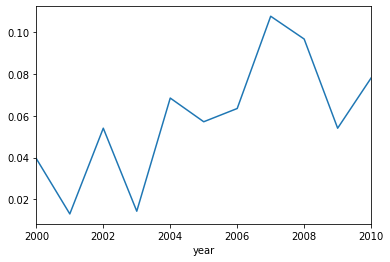

In [172]:
df.groupby('year')['uncertainty'].mean().plot()

## WordNet

In [ ]:
These examples are based on the [NLTK tutorial](https://www.nltk.org/howto/wordnet.html).

In [173]:
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn

In [176]:
wn.synsets('judge')

[Synset('judge.n.01'),
 Synset('evaluator.n.01'),
 Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [248]:
wn.synsets('judge', pos='v') # can filter on part of speech

[Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [181]:
judge = wn.synset('judge.n.01')
judge

Synset('judge.n.01')

In [182]:
judge.definition()

'a public official authorized to decide questions brought before a court of justice'

In [188]:
judge.examples()

[]

In [189]:
wn.synset('estimate.v.01').examples()

['I estimate this chicken to weigh three pounds']

In [199]:
# categories to which "judge.n.01" belongs
judge.hypernyms()

[Synset('adjudicator.n.01'), Synset('official.n.01')]

In [210]:
# the root category of "judge.n.01"
judge.root_hypernyms()

[Synset('entity.n.01')]

In [211]:
wn.synset('estimate.v.01').root_hypernyms()

[Synset('think.v.03')]

In [201]:
# members of the "judge.n.01" category
judge.hyponyms()

[Synset('alcalde.n.01'),
 Synset('chief_justice.n.01'),
 Synset('daniel.n.02'),
 Synset('doge.n.01'),
 Synset('justiciar.n.01'),
 Synset('magistrate.n.01'),
 Synset('ordinary.n.01'),
 Synset('praetor.n.01'),
 Synset('qadi.n.01'),
 Synset('recorder.n.03'),
 Synset('trial_judge.n.01'),
 Synset('trier.n.01')]

In [218]:
# "holonym" is a part of a whole
juror = wn.synset('juror.n.01')
juror.member_holonyms()

[Synset('jury.n.01')]

In [219]:
# can find "lowest common hypernyms":
judge.lowest_common_hypernyms(juror)

[Synset('person.n.01')]

In [220]:
# "lemmas" are specific senses of a specific word.
judge.lemmas()

[Lemma('judge.n.01.judge'),
 Lemma('judge.n.01.justice'),
 Lemma('judge.n.01.jurist')]

In [221]:
[lemma.name() for lemma in judge.lemmas()]

['judge', 'justice', 'jurist']

In [222]:
# lemmas have additional properties
judge_lemma = judge.lemmas()[0]
judge_lemma.derivationally_related_forms()

[Lemma('judicial.s.01.judicial'),
 Lemma('judicial.a.02.judicial'),
 Lemma('judicial.a.03.judicial'),
 Lemma('judgeship.n.01.judgeship'),
 Lemma('judge.v.05.judge'),
 Lemma('judge.v.05.adjudicate'),
 Lemma('decide.v.02.adjudicate')]

In [230]:
good = wn.synset('good.a.01').lemmas()[0]
good.antonyms()

[Lemma('bad.a.01.bad')]

In [231]:
good.pertainyms()

[]

In [240]:
# verb frames summarize the different semantic contexts that a verb can be used
judge_verb = wn.synset('estimate.v.01').lemmas()[4]
judge_verb.frame_strings()

['Somebody judge something', 'Somebody judge PP', 'Somebody judge that CLAUSE']

In [241]:
# measure similarity in the dictionary between words
judge.path_similarity(juror)

0.1111111111111111

In [246]:
judge.path_similarity(wn.synset('dog.n.01'))

0.14285714285714285

In [245]:
# Wu-Palmer similarity.
judge.wup_similarity(juror)

0.5454545454545454

In [247]:
judge.wup_similarity(wn.synset('dog.n.01'))

0.6666666666666666

In [254]:
# Can iterate over all synsets; e.g., all nouns:
for synset in list(wn.all_synsets('n')):
    if 'judg' in str(synset):
        print(synset)

Synset('judgeship.n.01')
Synset('judgment.n.02')
Synset('value_judgment.n.01')
Synset('judgment.n.03')
Synset('confession_of_judgment.n.01')
Synset('default_judgment.n.01')
Synset('final_judgment.n.01')
Synset('judgment_in_personam.n.01')
Synset('judgment_in_rem.n.01')
Synset('judgment_of_dismissal.n.01')
Synset('judgment_on_the_merits.n.01')
Synset('summary_judgment.n.01')
Synset('judgment.n.06')
Synset('judgment.n.04')
Synset('prejudgment.n.01')
Synset('judgment.n.01')
Synset('judges.n.01')
Synset('back_judge.n.01')
Synset('field_judge.n.01')
Synset('judge.n.01')
Synset('judge_advocate.n.02')
Synset('judge_advocate.n.01')
Synset('judge_advocate_general.n.01')
Synset('line_judge.n.01')
Synset('side_judge.n.01')
Synset('trial_judge.n.01')
Synset('judgment_lien.n.01')
Synset('judgment_day.n.01')


**Exercise**. Use wordnet to expand the set of words in the Baker-Bloom-Davis dictionary and re-compute policy uncertainty scores by year. 